In [1]:
import requests
from requests.auth import HTTPBasicAuth
import getpass
import json

email = "kurtwal98@berkeley.edu"
password = "aWd4Aqk-rS2EKDV"
url = 'http://www.vspdb.org/users/login'
headers = {}
headers['User-Agent'] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) 134.0.6998.118 Safari/537.36"
headers['Accept'] = "application/json"
r = requests.get(url, headers=headers, auth=HTTPBasicAuth(email,password))
token = json.loads(r.text)['token']

In [2]:
import pandas as pd
import requests
import json

headers = {}
headers["Accept"] = "application/json"
headers["User-Agent"] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) 134.0.6998.118 Safari/537.36"
headers["Authorization"] = "Bearer {}".format(token)
url = 'https://www.vspdb.org/vsLayerData?limit=20'
r= requests.get(url, headers=headers)
df = pd.DataFrame.from_dict(json.loads(r.text))

In [ ]:
import pandas as pd
import requests
import json

# Define headers and authentication
headers = {
    "Accept": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) 134.0.6998.118 Safari/537.36",
    "Authorization": f"Bearer {token}"
}

# Base URL
base_url = 'https://www.vspdb.org/vsLayerData?contain=VelocityMetadata'

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Pagination loop
page = 1
while True:
    # Add the page parameter to the URL
    url = f"{base_url}&page={page}&limit=100"
    response = requests.get(url, headers=headers)
    
    # Check if the response is successful
    if response.status_code != 200:
        print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")
        break
    
    # Parse the JSON response
    data = json.loads(response.text)
    
    # Check if there is data in the current page
    if not data:
        print("No more data to fetch.")
        break
    
    # Append the data to the DataFrame
    all_data = pd.concat([all_data, pd.DataFrame.from_dict(data)], ignore_index=True)
    
    # Move to the next page
    page += 1

# Display the collected data
print(all_data.head())

# Save the data to a CSV file
all_data.to_csv('vspdb_data.csv', index=False)

In [3]:
# Save this data in a zip file
import zipfile
import os
import pandas as pd

# Define the filename for the CSV file
csv_filename = 'vspdb_data.csv'

# Save the DataFrame to a CSV file
all_data = pd.read_csv(csv_filename)



In [4]:
# Check Nans in the DataFrame
nan_counts = all_data.isna().sum()
print("NaN counts in each column:")

NaN counts in each column:


In [5]:
all_data.describe()

,id,velocity_metadata_id,vs_top_depth,vs_bottom_depth,vs_layer_value
count,18186.000000,18186.000000,18186.000000,17977.000000,18165.000000
mean,9138.344331,1667.516441,30.515146,40.032391,463.942446
std,5278.405645,926.737896,84.466537,106.142016,432.648511
min,1.000000,1.000000,0.000000,0.060960,14.088500
25%,4584.250000,761.000000,3.352800,7.000000,216.641000
50%,9137.500000,1958.500000,11.392900,16.776200,321.869000
75%,13683.750000,2466.000000,25.000000,30.050000,532.000000
max,18279.000000,2968.000000,2222.910000,2259.480000,8500.000000


# Extract vs values

In [6]:
vs_id = all_data["velocity_metadata_id"].unique()
print(vs_id.shape)

(2382,)


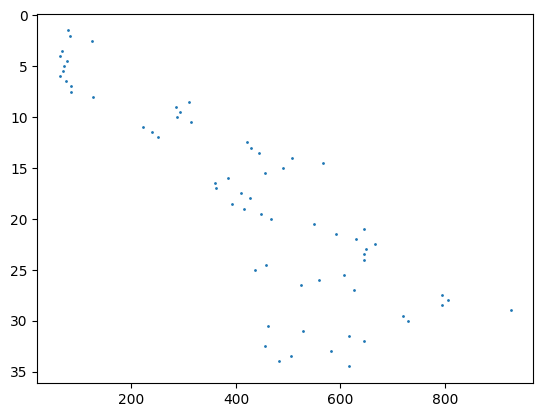

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the depth array
df = all_data[all_data["velocity_metadata_id"] == 1513]
min_depth = df["vs_top_depth"].min()
max_depth = df["vs_bottom_depth"].max()
depth = np.arange(min_depth, max_depth, 0.5)

# Initialize the vs_array with NaN values
vs_array = np.full_like(depth, np.nan, dtype=float)

# Iterate through each layer in the DataFrame
for _, row in df.iterrows():
    # Get the depth range for the current layer
    top_depth = row["vs_top_depth"]
    bottom_depth = row["vs_bottom_depth"]
    vs_value = row["vs_layer_value"]
    
    # Assign the vs_layer_value to the corresponding depth range in vs_array
    vs_array[(depth >= top_depth) & (depth < bottom_depth)] = vs_value

# Now, depth and vs_array are aligned

plt.scatter(vs_array, depth, s=1)
#plt.hlines(y=df["vs_bottom_depth"], xmin=0, xmax=5000, color="red", lw=1)
plt.gca().invert_yaxis()

In [34]:
df

,id,velocity_metadata_id,vs_top_depth,vs_bottom_depth,vs_layer_value,vs_halfspace,velocity_metadata
8189,8230,1513,0.0,1.0,NaN,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8190,8231,1513,1.0,1.5,NaN,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8191,8232,1513,1.5,2.0,79.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8192,8233,1513,2.0,2.5,82.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8193,8234,1513,2.5,3.0,124.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
...,...,...,...,...,...,...,...
8253,8294,1513,32.5,33.0,455.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8254,8295,1513,33.0,33.5,581.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8255,8296,1513,33.5,34.0,505.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."
8256,8297,1513,34.0,34.4,483.0,False,"{'id': 1513, 'test_id': 1455, 'velocity_name':..."


In [35]:
import numpy as np

def create_vs_profile(df, vs_id):
    """
    Create depth and vs_array for a given vs_id.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        vs_id (int): The velocity metadata ID to filter the data.
    
    Returns:
        tuple: A tuple containing the depth array and vs_array.
    """
    # Filter the DataFrame for the given vs_id
    warning_idx = 1
    filtered_df = df[df["velocity_metadata_id"] == vs_id]
    
    # Define the depth array
    min_depth = filtered_df["vs_top_depth"].min()
    max_depth = filtered_df["vs_bottom_depth"].max()
    #print(f"min_depth: {min_depth}, max_depth: {max_depth}")
    depth = np.arange(min_depth, max_depth, 0.5)
    
    # Initialize the vs_array with NaN values
    vs_array = np.full_like(depth, np.nan, dtype=float)
    
    # Iterate through each layer in the filtered DataFrame
    for _, row in filtered_df.iterrows():
        # Get the depth range for the current layer
        top_depth = row["vs_top_depth"]
        bottom_depth = row["vs_bottom_depth"]
        vs_value = row["vs_layer_value"]
        
        # Assign the vs_layer_value to the corresponding depth range in vs_array
        vs_array[(depth >= top_depth) & (depth < bottom_depth)] = vs_value

    # Check if Nans are present in vs_array
    if np.isnan(vs_array).any():
        # Avoid case
        print(f"Warning: NaN values found in vs_array for vs_id {vs_id}.")
        warning_idx = 0
        
    
    return depth, vs_array, warning_idx

# Create a dictionary to store the depth and vs_array for each vs_id
vs_profiles = {}

# Iterate over all unique vs_id values
for vs_id in all_data["velocity_metadata_id"].unique():
    depth, vs_array, warning_idx = create_vs_profile(all_data, vs_id)
    if warning_idx == 1:
        # Store the depth and vs_array in the dictionary
        vs_profiles[vs_id] = (depth, vs_array)

# Now vs_profiles is a dictionary where each key is a vs_id, and the value is a tuple (depth, vs_array)

In [36]:
# Save the dictionary
import pickle
with open('vs_profiles.pkl', 'wb') as f:
    pickle.dump(vs_profiles, f)